In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
%matplotlib inline

In [221]:
df=pd.read_csv('USA_Housing.csv')

In [27]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [29]:
df.shape

(5000, 7)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [33]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [37]:
df.isnull().count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [39]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [41]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

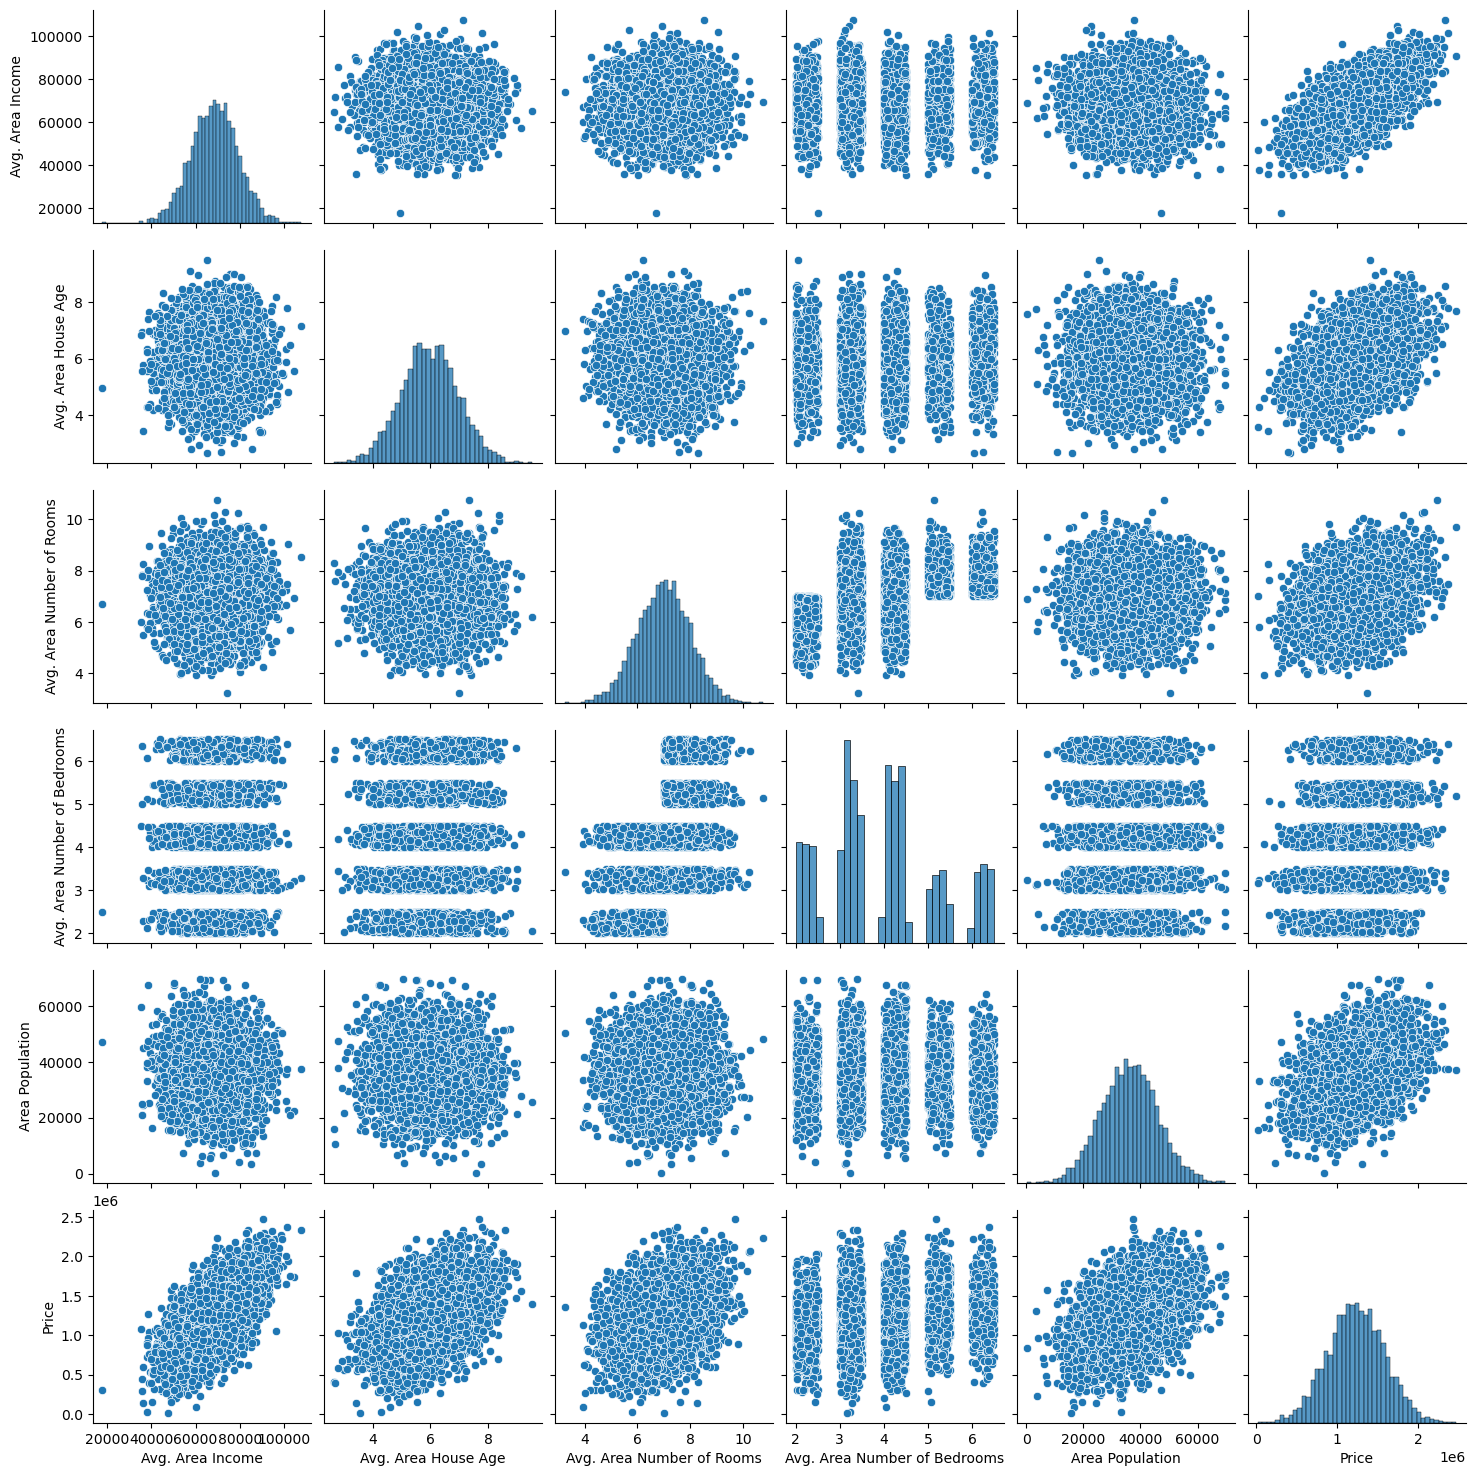

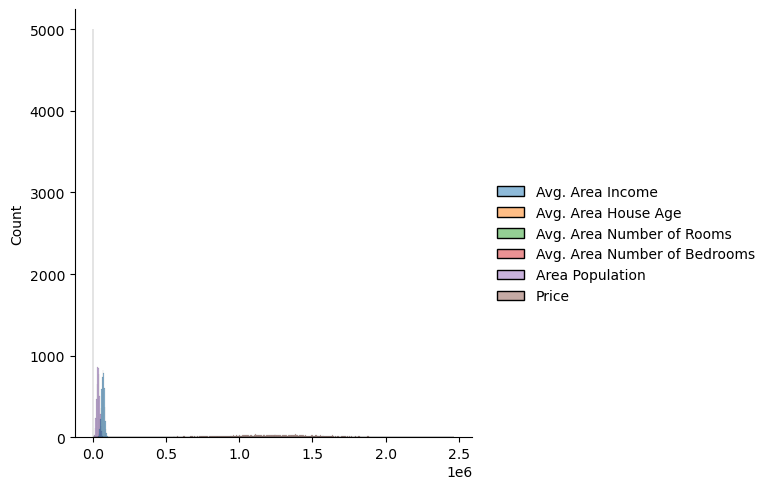

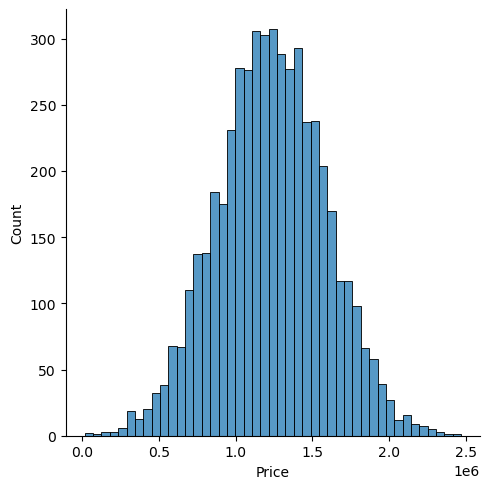

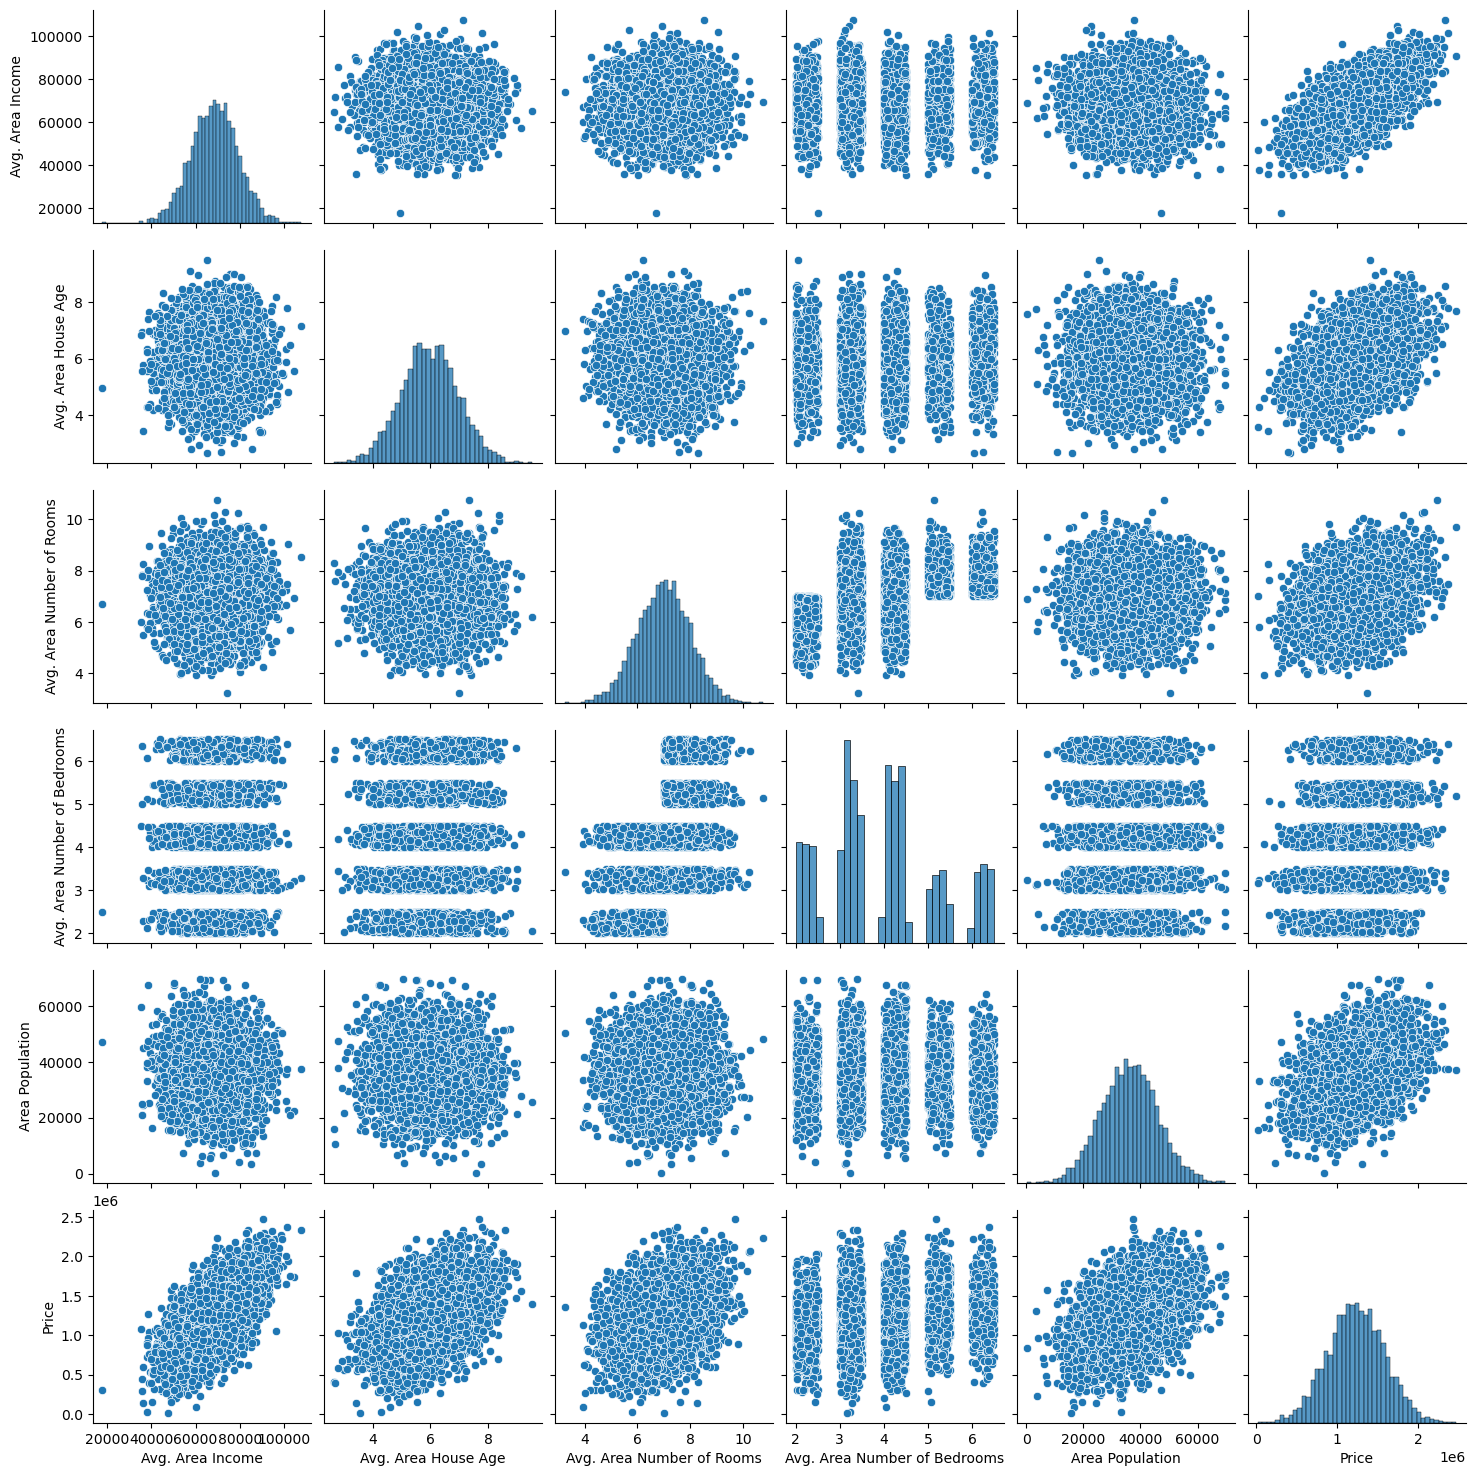

In [63]:
# This dataset is artificially created
# Histogram, corrolation and scatterplots of all the columns 
# we can see in histogram everything is more or less normally distributed
# except forthe average number of bedrooms, it's segmented to 2,3,4,5,6. There is soem noise around there
# cause we can't have 4.5 bedrooms
sns.pairplot(df)
plt.show()

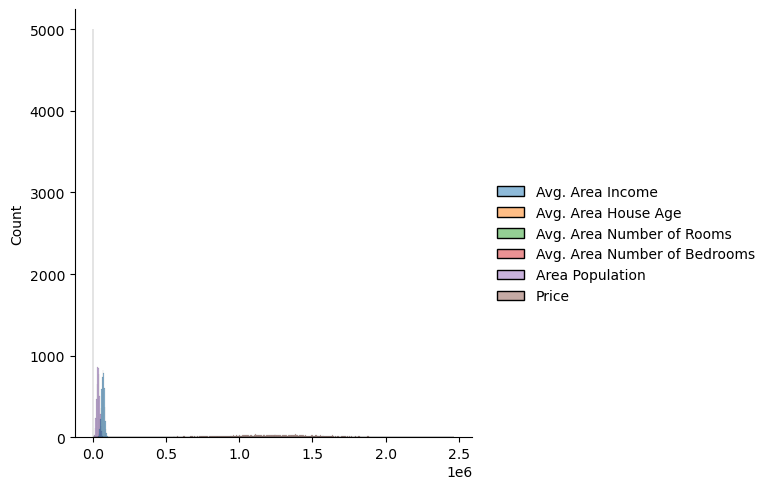

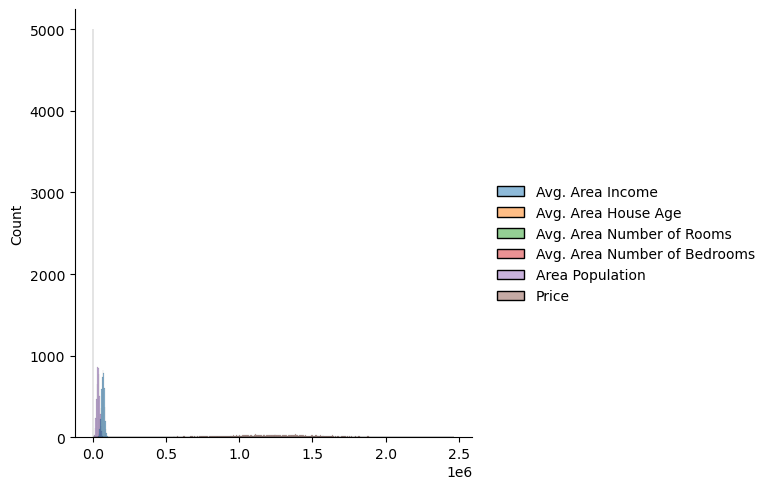

In [67]:
sns.displot(df)
plt.show()

/var/folders/z_/srqbcrjd38n00h_v2pystqp80000gn/T/ipykernel_6028/2538647509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],kde=True,bins=30,vertical=False,rug=True,hist=True)


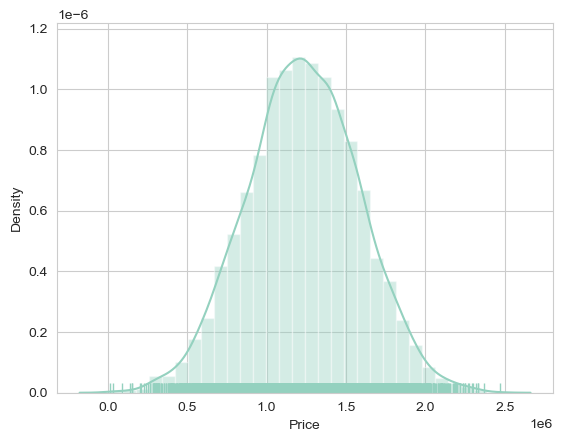

In [107]:
# Checking out distribution of Price column (our Target Column)
sns.distplot(df['Price'],kde=True,bins=30,vertical=False,rug=True,hist=True)
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plt.show()
# The average price falls somewhere around 1m and 1.5m. 
# This is a nice case we're not gonna work on cleaning the data

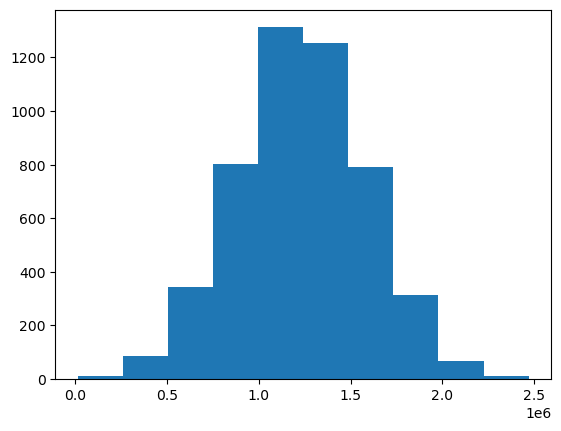

In [88]:
# simple plots to checkout data
plt.hist(x=df['Price'])
plt.show()

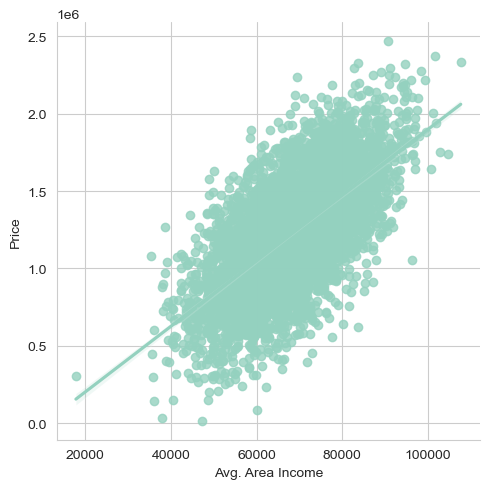

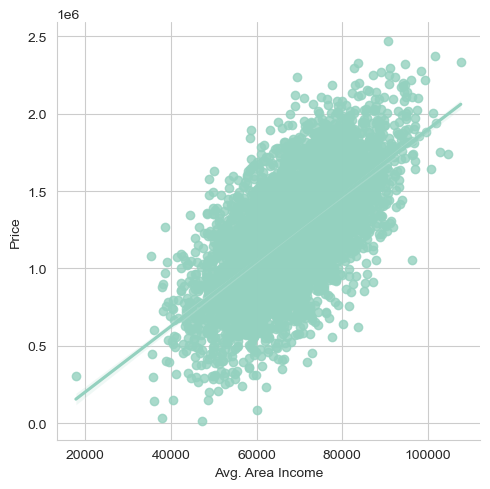

In [225]:
sns.lmplot(x='Avg. Area Income',y='Price',data=df)
plt.show()

In [115]:
df.corr()

ValueError: could not convert string to float: '208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [131]:
# df.drop('Address',axis=1,inplace=True)
df_numeric = df.select_dtypes(include='number')

In [137]:
# The Heatmap of the corrolation between each of the columns
df_corr=df_numeric.corr()
df_corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


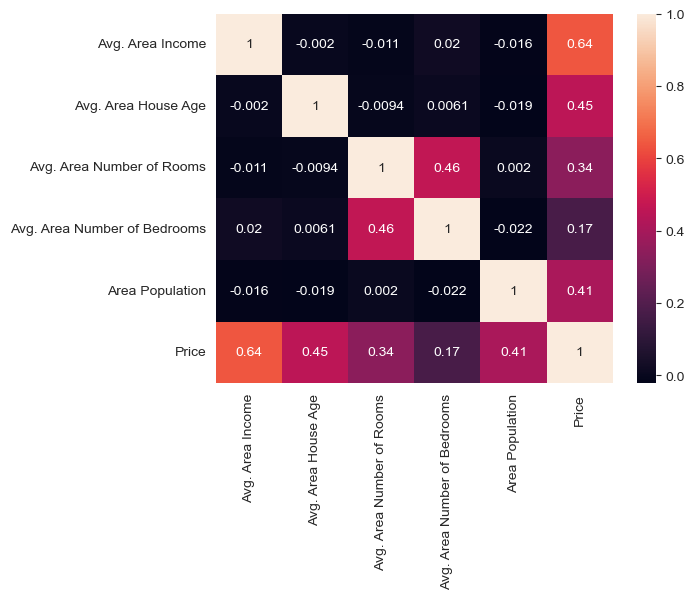

In [143]:
# a diagonal full correlation, each column is perfectly corrolated with itself
# we have alot of black(low corrolation) amount
sns.heatmap(df_corr,annot=True)
plt.show()

In [151]:
sns.lmplot(data=df,x='Price',y='Avg. Area Income')
# plt.show()

In [159]:
from sklearn.model_selection import train_test_split

In [157]:
# We earlier tossed out Address column as it contains non numeric data (df_numeric = df.select_dtypes(include='number'))
df_numeric.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [173]:
df_numeric.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [175]:
X=df_numeric[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [177]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [179]:
y=df_numeric['Price']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [183]:
from sklearn.linear_model import LinearRegression

In [187]:
linear_model=LinearRegression()

In [195]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [197]:
# Model evaluation
print(linear_model.intercept_)

-2641372.6673014304


In [199]:
linear_model.coef_

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [209]:
pd.DataFrame(linear_model.coef_.T,X_train.columns,columns=['Coeff'])
# A one unit increase in Avg. Area House Age is associated with 165221.119872 increase in Price of the House 

,Coeff
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [211]:
# Prediction
predict = linear_model.predict(X_test)

In [213]:
predict

array([1258934.89505291,  822694.63411042, 1742214.39530122, ...,
       1452640.96473339,  645797.13026312, 1364943.76221893])

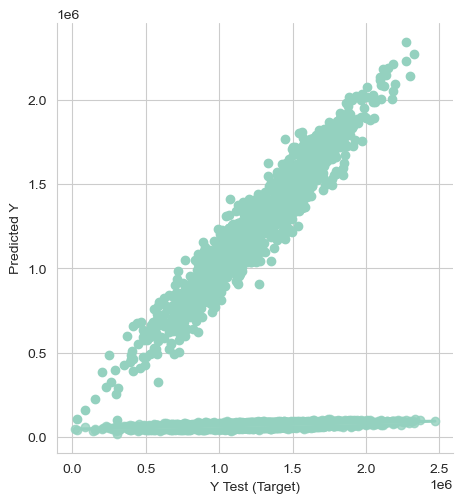

In [215]:
# Evaluation
plt.scatter(y_test,predict)
plt.xlabel('Y Test (Target)')
plt.ylabel('Predicted Y')
plt.show()

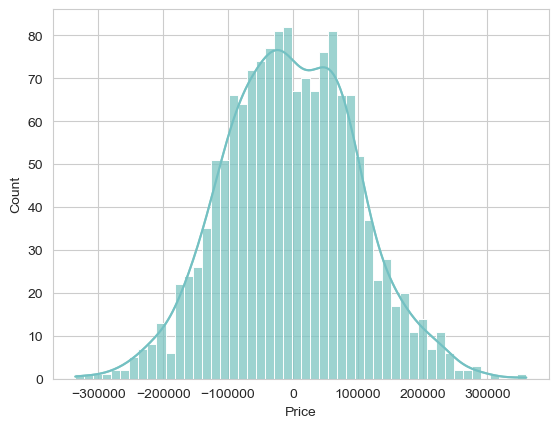

In [219]:
sns.histplot((y_test - predict), bins=50, kde=True)
plt.show()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

sns.lineplot(data=y_test, label="Actual Price" , color="green" ,linestyle="--" ,linewidth=2,markers="o")
sns.lineplot(data=y_pred_sorted,label="Predicted Price", color="blue",linewidth=2, linestyle="-",markers="s")
plt.title('Actual vs Predicted Car Prices (Line Chart)')


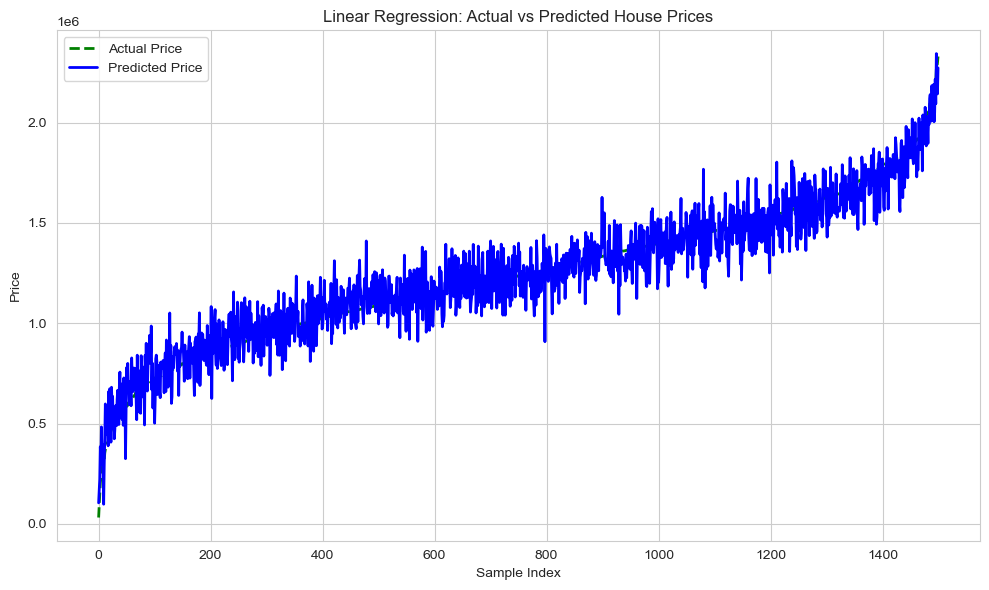

In [227]:
# Sort actual and predicted for better comparison
y_test_sorted, y_pred_sorted = zip(*sorted(zip(y_test, predict)))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=y_test_sorted, label="Actual Price", color="green", linestyle="--", linewidth=2)
sns.lineplot(data=y_pred_sorted, label="Predicted Price", color="blue", linestyle="-", linewidth=2)
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

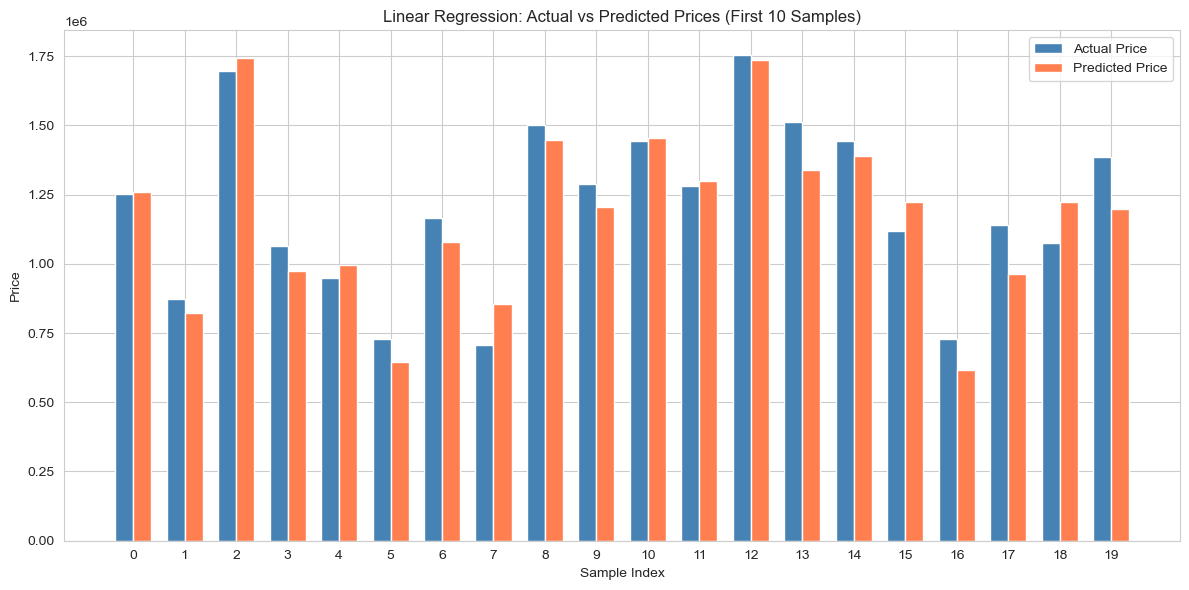

In [239]:
# let's visually compares the actual vs predicted prices for the first 10 rows in our test data.
# to examine how well our model performs on unseen data (real vs predicted data)
n = 20
indices = np.arange(n)
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(indices, y_test.iloc[:n], width=bar_width, label='Actual Price', color='steelblue')
plt.bar(indices + bar_width, predict[:n], width=bar_width, label='Predicted Price', color='coral')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs Predicted Prices (First 10 Samples)')
plt.xticks(indices + bar_width / 2, labels=[str(i) for i in range(n)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight on Bar Chart
### 1. Model Performance is Generally Reasonable
Most orange bars (predicted prices) are close to the blue bars (actual prices), meaning Linear Regression model has learned the general pricing pattern.

### 2. Underprediction Trend
In several samples — for example:

* Sample 2 (index 2)
* Sample 8
* Sample 13
* Sample 18

The orange bars (predicted prices) are consistently lower than the actual prices.

This could mean model slightly underpredicts for higher-priced homes. Linear regression can sometimes struggle with `extreme values` or `skewed distributions`.

### 3. Low-Price Range Still Varies
At the lower end (e.g., samples 5, 7, 16):

The prediction is again lower than actual, though the margin is smaller.

This might mean the model `underfits` slightly or doesn’t fully capture `nonlinear influences` (like area, room count, etc.).

In [235]:
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.92
Mean Squared Error: 10169125565.90


## Model Improvement
For a bette result we are going to:
1.  Log-transform the target variable Price (Log transformation helps stabilize variance and normalize skewed price distributions.)
2. Add an Interaction Feature
   We'll create a new feature: `Avg. Area Number of Rooms × Avg. Area Income`

In [248]:
df['Rooms_Income_Interaction'] = (
    df['Avg. Area Number of Rooms'] * df['Avg. Area Income']
)

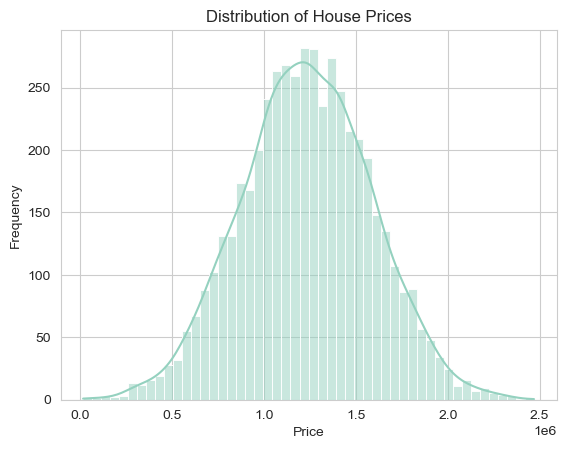

In [250]:
# Histogram of original prices
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

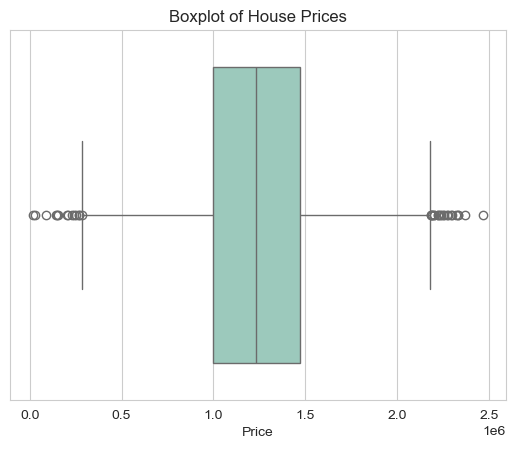

In [252]:

# Boxplot to visualize outliers
sns.boxplot(x=df['Price'])
plt.title('Boxplot of House Prices')
plt.show()

In [254]:
# Optional outlier capping
price_cap = df['Price'].quantile(0.99)
df = df[df['Price'] < price_cap]


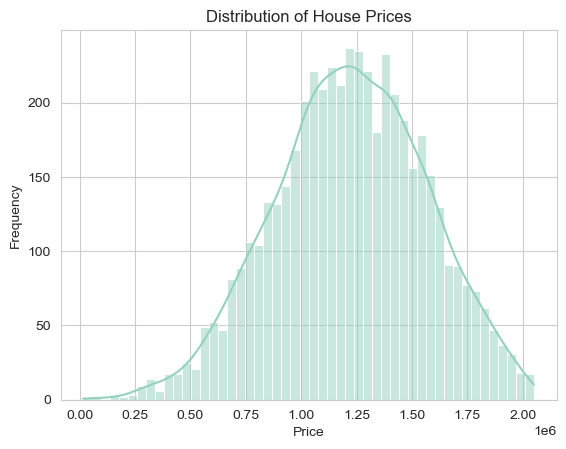

In [256]:
# Histogram of original prices
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [258]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 
        'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
        'Area Population', 'Rooms_Income_Interaction']]

In [267]:
y = np.log(df['Price'])

In [269]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [271]:

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [273]:
# Predict and reverse log
y_pred_log = model.predict(X_test)

In [275]:
y_pred = np.exp(y_pred_log)

In [277]:
y_test_original = np.exp(y_test)

In [279]:
# Evaluation
print("R² Score:", r2_score(y_test_original, y_pred))
print("MSE:", mean_squared_error(y_test_original, y_pred))

R² Score: 0.8667791306718304
MSE: 15392035555.608786


In [ ]:
n = 20
indices = np.arange(n)
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(indices, y_test.iloc[:n], width=bar_width, label='Actual Price', color='steelblue')
plt.bar(indices + bar_width, predict[:n], width=bar_width, label='Predicted Price', color='coral')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs Predicted Prices (First 10 Samples)')
plt.xticks(indices + bar_width / 2, labels=[str(i) for i in range(n)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

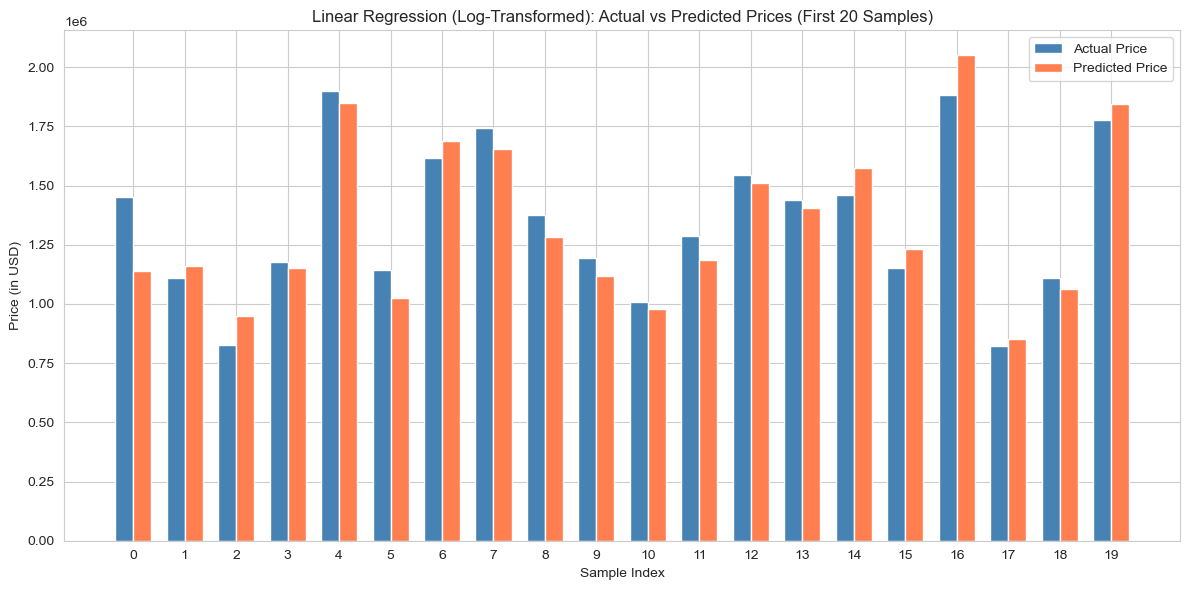

In [281]:
n = 20
indices = np.arange(n)
bar_width = 0.35

# Take first 20 actual and predicted prices
actual_prices = y_test_original[:n]
predicted_prices = y_pred[:n]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices, actual_prices, width=bar_width, label='Actual Price', color='steelblue')
plt.bar(indices + bar_width, predicted_prices, width=bar_width, label='Predicted Price', color='coral')
plt.xlabel('Sample Index')
plt.ylabel('Price (in USD)')
plt.title('Linear Regression (Log-Transformed): Actual vs Predicted Prices (First 20 Samples)')
plt.xticks(indices + bar_width / 2, labels=[str(i) for i in range(n)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight on Bar chart after log transformation and capped interaction feature
### 1. Overall Fit is Much Better Now
Compared to previous (non-transformed) Linear Regression model, the predictions are:

* Closer to the actual values
* Less under- or over-predicted on the extremes

**This means log transformation + outlier capping + interaction feature has clearly improved  model’s generalization!** 

### 2. Still Slight Overprediction on Some Samples
For example:

Sample 14 and 16 have slightly higher predictions than the actual values.

These could be homes that had some localized issue or features not captured by our existing variables.

But overall, the margin is small and expected in real-world data.

### 3. Balanced Error Spread
Both overpredictions and underpredictions are present across the 20 samples.

This balance suggests our model is not biased toward over- or under-estimation.